In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.preprocessing import OneHotEncoder
from email.utils import parseaddr
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from scipy.sparse import hstack

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import LinearSVC

from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc

## Import Dataset

In [2]:
CEAS = pd.read_csv("Dataset/CEAS_08.csv")
Nazario = pd.read_csv("Dataset/Nazario.csv")
Nigerian = pd.read_csv("Dataset/Nigerian_Fraud.csv")
SpamAssasin = pd.read_csv("Dataset/SpamAssasin.csv")

In [3]:
CEAS

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1
...,...,...,...,...,...,...,...
39149,CNN Alerts <charlene-detecton@btcmarketing.com>,email1007@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:34:50 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39150,CNN Alerts <idgetily1971@careplusnj.org>,email104@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:35:11 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39151,Abhijit Vyas <xpojhbz@gmail.com>,fxgmqwjn@triptracker.net,"Fri, 08 Aug 2008 22:00:43 +0800",Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0
39152,Joseph Brennan <vupzesm@columbia.edu>,zqoqi@spamassassin.apache.org,"Fri, 08 Aug 2008 09:00:46 -0500",Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0


In [4]:
Nazario

,sender,receiver,date,subject,body,urls,label
0,Mail System Internal Data <MAILER-DAEMON@monke...,NaN,28 Sep 2017 09:57:25 -0400,DON'T DELETE THIS MESSAGE -- FOLDER INTERNAL DATA,This text is part of the internal format of yo...,1,1
1,cPanel <service@cpanel.com>,jose@monkey.org,"Fri, 30 Oct 2015 00:00:48 -0500",Verify Your Account,Business with \t\t\t\t\t\t\t\tcPanel & WHM \t...,1,1
2,Microsoft Outlook <recepcao@unimedceara.com.br>,NaN,"Fri, 30 Oct 2015 06:21:59 -0300 (BRT)",Helpdesk Mailbox Alert!!!,Your two incoming mails were placed on pending...,1,1
3,Ann Garcia <AnGarcia@mcoe.org>,"""info@maaaaa.org"" <info@maaaaa.org>","Fri, 30 Oct 2015 14:54:33 +0000",IT-Service Help Desk,Password will expire in 3 days. Click Here To ...,0,1
4,"""USAA"" <usaaacctupdate@sccu4u.com>",Recipients <usaaacctupdate@sccu4u.com>,"Fri, 30 Oct 2015 14:02:33 -0500",Final USAA Reminder - Update Your Account Now,"To ensure delivery to your inbox, please add U...",1,1
...,...,...,...,...,...,...,...
1560,info advantageapartments.com <info@advantageap...,"""jose@monkey.org"" <jose@monkey.org>","Sun, 11 Dec 2022 12:04:50 +0000",Receipt for Your Payment to FTX.,PayPal You sent a payment of $699.99 USD to FT...,0,1
1561,monkey.org <HELPDESK@monkey.org>,jose@monkey.org,15 Dec 2022 18:33:00 -0500,Rectify Your Password With monkey.org,"monkey.org Hi jose,Pa⁠s⁠sword for⁠ jose@monke...",1,1
1562,Help Center\n\t<info.help-center.co.za_info.he...,jose@monkey.org,"Tue, 20 Dec 2022 23:00:27 +0000 (UTC)",Netflix : We're having some trouble with your ...,"HELLO, Please note that, your monthly paymen...",1,1
1563,MetaMask <info@sofamekar.com>,jose@monkey.org,27 Dec 2022 10:56:49 +0800,Your MetaMask wallet will be suspended,Verify your MetaMask Wallet Our system has sho...,1,1


In [5]:
Nigerian

,sender,receiver,date,subject,body,urls,label
0,MR. JAMES NGOLA. <james_ngola2002@maktoob.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 02:38:20 +0000",URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...,0,1
1,Mr. Ben Suleman <bensul2004nng@spinfinder.com>,R@M,"Thu, 31 Oct 2002 05:10:00 -0000",URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",0,1
2,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 22:17:55 +0100",GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,0,1
3,PRINCE OBONG ELEME <obong_715@epatra.com>,webmaster@aclweb.org,"Thu, 31 Oct 2002 22:44:20 -0000",GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,0,1
4,Maryam Abacha <m_abacha03@www.com>,R@M,"Fri, 01 Nov 2002 01:45:04 +0100",I Need Your Assistance.,"Dear sir, \n \nIt is with a heart full of hope...",0,1
...,...,...,...,...,...,...,...
3327,michealagu0255@zipmail.com.br,NaN,NaN,CONTACT GLOBAL MAX SHIPING COMPANY,"Atten: My Dear ,\n \nI have Paid the fee for y...",0,1
3328,ali sherif <ali_sherif252@hotmail.fr>,NaN,"Mon, 17 Sep 2007 22:28:11 +0000",TREAT AS URGENT.,\nFrom: Mr Ali Sherif. African Development Ban...,1,1
3329,Dr Usman Ibrahim Danko <drusmanibrahimtg08@hot...,NaN,"Tue, 18 Sep 2007 10:54:53 +0000",From Dr Usman Ibrahim / Mr Wahid Yoffe property.,\nFROM DR USMAN IBRAHIM DANKO.AUDITING AND ACC...,1,1
3330,Mother Doris Killam <motherdorisk61@hotmail.com>,NaN,"Wed, 19 Sep 2007 00:52:16 +0100",My Beloved In Christ.,"\nBeloved in the Lord Jesus Christ, PLEASE END...",1,1


In [6]:
SpamAssasin

,sender,receiver,date,subject,body,label,urls
0,Robert Elz <kre@munnari.OZ.AU>,Chris Garrigues <cwg-dated-1030377287.06fa6d@D...,"Thu, 22 Aug 2002 18:26:25 +0700",Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0,1
1,Steve Burt <Steve_Burt@cursor-system.com>,"""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoo...","Thu, 22 Aug 2002 12:46:18 +0100",[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,1
2,"""Tim Chapman"" <timc@2ubh.com>",zzzzteana <zzzzteana@yahoogroups.com>,"Thu, 22 Aug 2002 13:52:38 +0100",[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0,1
3,Monty Solomon <monty@roscom.com>,undisclosed-recipient: ;,"Thu, 22 Aug 2002 09:15:25 -0400",[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0,1
4,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,zzzzteana@yahoogroups.com,"Thu, 22 Aug 2002 14:38:22 +0100",Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0,1
...,...,...,...,...,...,...,...
5804,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,1
5805,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,"Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,1
5806,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,1
5807,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,"Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,0


## Check if they are the same

In [7]:
#CEAS, Nazario, Nigerian Fraud, and SpamAssassin Datasets

print("Ceas: ", CEAS.columns)
print("Nazario: ", Nazario.columns)
print("Nigerian: ", Nigerian.columns)
print("Spam: ", SpamAssasin.columns)

Ceas:  Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'], dtype='object')
Nazario:  Index(['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label'], dtype='object')
Nigerian:  Index(['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label'], dtype='object')
Spam:  Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'], dtype='object')


## Statistics about the Dataset

In [8]:
print("Total number of emails: ", CEAS.shape[0]+ Nazario.shape[0] + Nigerian.shape[0]+ SpamAssasin.shape[0])

Total number of emails:  49860


In [9]:
dataset = pd.concat([CEAS, Nazario, Nigerian, SpamAssasin], ignore_index=True)

In [10]:
dataset.shape

(49860, 7)

In [11]:
dataset

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1
...,...,...,...,...,...,...,...
49855,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,1
49856,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,"Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,1
49857,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,1
49858,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,"Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,0


In [12]:
print(dataset['label'].value_counts())  # Class Repartition

label
1    28457
0    21403
Name: count, dtype: int64


In [13]:
print(dataset.isna().sum())  # Vérifier les valeurs manquantes

sender       331
receiver    2092
date         483
subject       87
body           1
label          0
urls           0
dtype: int64


In [14]:
# We can see some values are null. We will replace them
dataset['sender'] = dataset['sender'].fillna('unknown')
dataset['date'] = dataset['date'].fillna('unknown')
dataset['subject'] = dataset['subject'].fillna('')
dataset['body'] = dataset['body'].fillna('')

In [15]:
# I delete the receiver column because it is not usefull
dataset = dataset.drop('receiver', axis=1)


In [16]:
dataset

,sender,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1
...,...,...,...,...,...,...
49855,Professional_Career_Development_Institute@Frug...,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,1
49856,"""IQ - TBA"" <tba@insiq.us>","Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,1
49857,Mike <raye@yahoo.lv>,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,1
49858,"""Mr. Clean"" <cweqx@dialix.oz.au>","Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,0


## Infos about the dataset

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49860 entries, 0 to 49859
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sender   49860 non-null  object
 1   date     49860 non-null  object
 2   subject  49860 non-null  object
 3   body     49860 non-null  object
 4   label    49860 non-null  int64 
 5   urls     49860 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.3+ MB


<Axes: xlabel='label'>

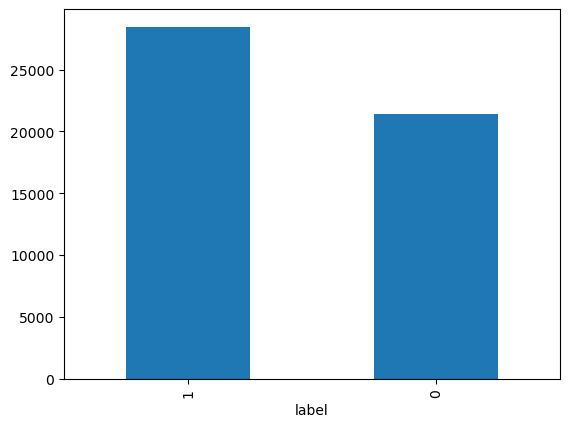

In [18]:
dataset['label'].value_counts().plot(kind='bar')


In [19]:
# Infos about the length of e-mails.
length_infos = pd.DataFrame()
length_infos['subject_length'] = dataset['subject'].apply(len)
length_infos['body_length'] = dataset['body'].apply(len)
length_infos[['subject_length', 'body_length']].describe()

,subject_length,body_length
count,49860.000000,4.986000e+04
mean,37.667569,1.839289e+03
std,23.734940,2.152051e+04
min,0.000000,0.000000e+00
25%,23.000000,2.810000e+02
50%,34.000000,7.090000e+02
75%,49.000000,2.018000e+03
max,2657.000000,4.599644e+06


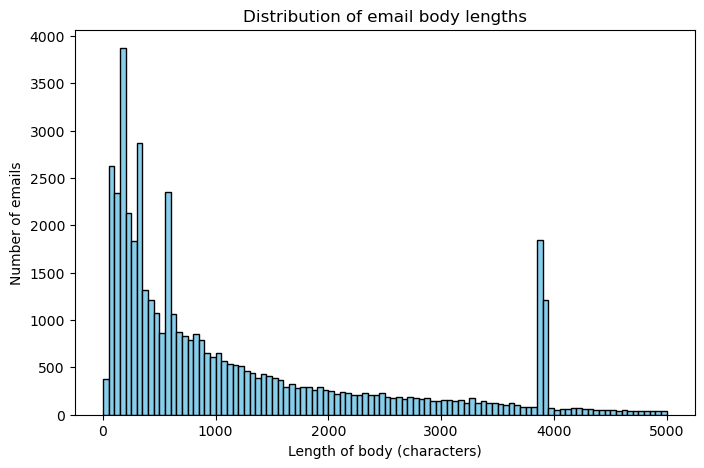

In [20]:
plt.figure(figsize=(8,5))
plt.hist(length_infos['body_length'], bins=100, color='skyblue', edgecolor='black', range=(0, 5000))
plt.title("Distribution of email body lengths")
plt.xlabel("Length of body (characters)")
plt.ylabel("Number of emails")
plt.show()

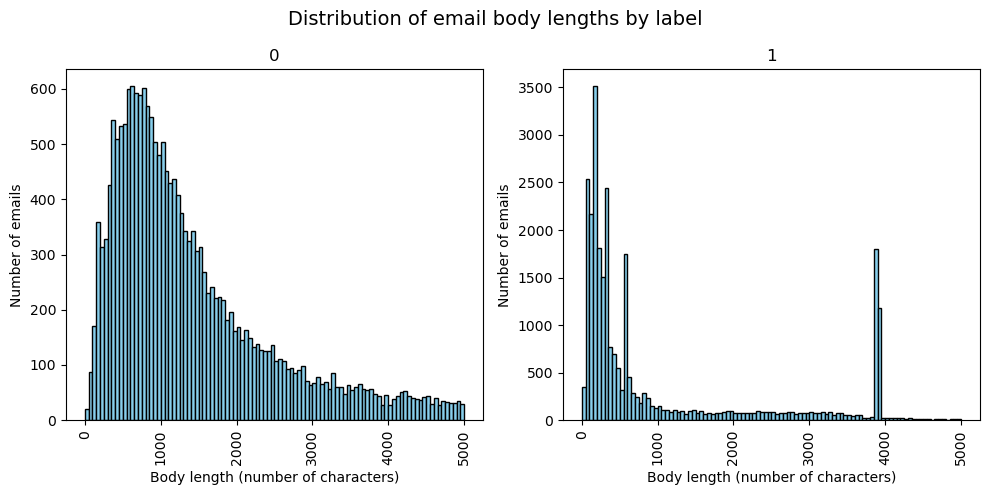

In [21]:
import matplotlib.pyplot as plt

length_infos['body_length'] = dataset['body'].fillna('').astype(str).apply(len)
length_infos['label'] = dataset['label']

axes = length_infos.hist(
    column='body_length',
    by='label',
    bins=100,
    figsize=(10,5),
    range=(0, 5000),
    color='skyblue',
    edgecolor='black'
)

# Ajouter les labels
for ax in axes.flatten():
    ax.set_xlabel('Body length (number of characters)')
    ax.set_ylabel('Number of emails')

plt.suptitle('Distribution of email body lengths by label', fontsize=14)
plt.tight_layout()
plt.show()


In [22]:
## Now we analyse if some senders domains are recurents
length_infos['sender_domain'] = dataset['sender'].apply(lambda x: x.split('@')[-1] if '@' in x else 'unknown')
print("number of unique domains:", length_infos['sender_domain'].nunique())
length_infos['sender_domain'].value_counts().head(10)


number of unique domains: 19745


sender_domain
gmail.com>                 2657
unknown                    1318
hotmail.com>                637
spamassassin.taint.org>     603
yahoo.com>                  535
python.org>                 527
issues.apache.org           462
v.loewis.de>                289
google.com>                 240
telefonica.net>             209
Name: count, dtype: int64

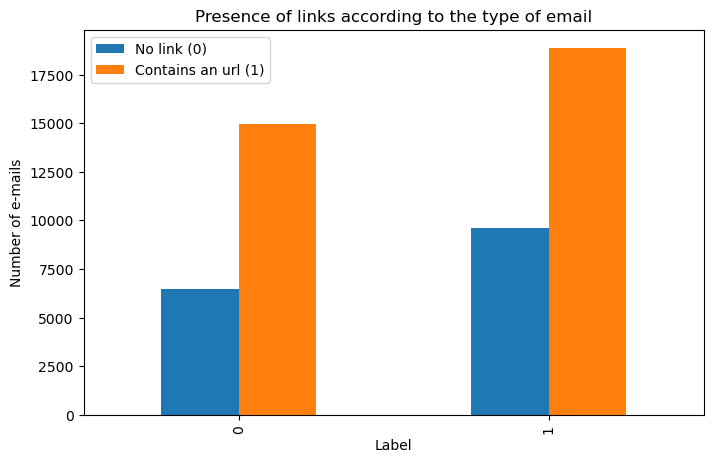

In [23]:
# counting emails containing urls or not
links_count = dataset.groupby(['label', 'urls']).size().unstack(fill_value=0)

# Barplot
links_count.plot(kind='bar', figsize=(8, 5))
plt.title("Presence of links according to the type of email")
plt.xlabel("Label")
plt.ylabel("Number of e-mails")
plt.legend(["No link (0)", "Contains an url (1)"])
plt.show()

# PreProcessing

In [24]:
dataset.head()

,sender,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


As we can see, the data are string. We need to turn this into numbers and vectors so the model will understant it. Datas are also not normalised and a lot of infos are still unusefull.

### Sender preprocessing

In [25]:
df = pd.DataFrame()
df = dataset.copy()
df

,sender,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1
...,...,...,...,...,...,...
49855,Professional_Career_Development_Institute@Frug...,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,1
49856,"""IQ - TBA"" <tba@insiq.us>","Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,1
49857,Mike <raye@yahoo.lv>,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,1
49858,"""Mr. Clean"" <cweqx@dialix.oz.au>","Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,0


In [26]:
# === 1. Extract the main components ===

def extract_sender_features(sender):
    #empty string
    if not isinstance(sender, str) or sender.strip() == "":
        return pd.Series(["unknown", "unknown", "unknown", "unknown"])
    
    name, email = parseaddr(sender.strip())

    #empty name -> deduce it from the mail
    if not name and isinstance(email, str) and '@' in email:
        local_part = email.split('@')[0]
        name = re.sub(r'[_\.]+', ' ', local_part).strip().title()

    if not name:
        name = "unknown"

    domain_match = re.search(r'@([A-Za-z0-9.-]+)', email or "")
    domain = domain_match.group(1).lower() if domain_match else "unknown"
    tld = domain.split('.')[-1] if '.' in domain else "unknown"

    email = email.lower() if email else "unknown"

    return pd.Series([name.lower(), email, domain, tld])

df[['sender_name', 'sender_email', 'sender_domain', 'sender_tld']] = df['sender'].apply(extract_sender_features)

In [27]:
# === 2. Features about the domain ===

free_domains = {
    'gmail.com', 'yahoo.com', 'hotmail.com', 'outlook.com', 'aol.com',
    'wanadoo.fr', 'live.com', 'laposte.net', 'orange.fr', 'icloud.com'
}

risky_tlds = {'ru', 'cn', 'tk', 'biz', 'top', 'su', 'info'}


df['is_free_domain'] = df['sender_domain'].isin(free_domains).astype(int)
df['domain_length'] = df['sender_domain'].str.len().fillna(0)
df['subdomain_count'] = df['sender_domain'].str.count('\.').fillna(0)
df['is_risky_tld'] = df['sender_tld'].isin(risky_tlds).astype(int)

In [28]:
# === 3. Features about the name ===
df['name_has_digits'] = df['sender_name'].str.contains(r'\d').fillna(False).astype(int)
df['name_has_specials'] = df['sender_name'].str.contains(r'[^A-Za-z\s]').fillna(False).astype(int)
df['name_length'] = df['sender_name'].str.len().fillna(0)
df['name_word_count'] = df['sender_name'].str.split().apply(lambda x: len(x) if isinstance(x, list) else 0)

In [29]:
# === 4. Only keep 100 most frequents domains + 'other and 50 most frequents LTD'
# Top 100 domains
top_domains = df['sender_domain'].value_counts().nlargest(100).index
# Top 50 TLDs
top_tlds = df['sender_tld'].value_counts().nlargest(50).index


# --- Encode top domains ---
df['sender_domain_encoded'] = df['sender_domain'].apply(
    lambda x: x if x in top_domains else 'other'
)
# --- Encode top TLDs ---
df['sender_tld_encoded'] = df['sender_tld'].apply(
    lambda x: x if x in top_tlds else 'other'
)

# --- Label encoding ---
from sklearn.preprocessing import LabelEncoder

domain_le = LabelEncoder()
df['sender_domain_encoded'] = domain_le.fit_transform(df['sender_domain_encoded'])

tld_le = LabelEncoder()
df['sender_tld_encoded'] = tld_le.fit_transform(df['sender_tld_encoded'])



In [30]:
# === 5. Cleaning ===
df = df.drop(columns=['sender', 'sender_name', 'sender_domain', 'sender_email', 'sender_tld'])  #keep sender column and the added columns


In [31]:
df

,date,subject,body,label,urls,is_free_domain,domain_length,subdomain_count,is_risky_tld,name_has_digits,name_has_specials,name_length,name_word_count,sender_domain_encoded,sender_tld_encoded
0,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1,0,9,1,0,0,0,14,2,60,13
1,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1,0,9,1,0,0,0,3,1,60,38
2,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,0,19,2,0,1,1,12,3,60,5
3,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1,0,9,1,0,0,0,14,2,64,11
4,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1,0,19,1,0,0,0,14,2,60,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49855,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,1,0,13,1,0,0,0,41,4,60,11
49856,"Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,1,0,8,1,0,0,1,8,3,60,49
49857,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,1,0,8,1,0,0,0,4,1,60,38
49858,"Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,0,0,12,2,0,0,1,9,2,60,2


### Date preprocessing

In [32]:
df['date_clean'] = df['date'].astype(str)

# delete ()
df['date_clean'] = df['date_clean'].str.replace(r'\s*\(.*?\)', '', regex=True)

# delete special characters
df['date_clean'] = df['date_clean'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

# normalise time zones
tz_map = {
    'EDT': '-0400', 'EST': '-0500',
    'CDT': '-0500', 'CST': '-0600',
    'MDT': '-0600', 'MST': '-0700',
    'PDT': '-0700', 'PST': '-0800',
    'CET': '+0100', 'CEST': '+0200',
    'UTC': '+0000', 'GMT': '+0000'
}

for tz, offset in tz_map.items():
    df['date_clean'] = df['date_clean'].str.replace(rf'\b{tz}\b', offset, regex=True)

In [33]:
## parse dates to create new columns
def parse_date_flexible(date_str):
    if not isinstance(date_str, str) or date_str.strip() == "":
        return pd.NaT

    formats = [
        "%a, %d %b %Y %H:%M:%S %z",  # with time zone
        "%a, %d %b %Y %H:%M:%S",     # without time zone
        "%d %b %Y %H:%M:%S %z",      # without week day
        "%d %b %Y %H:%M:%S"          # simple
    ]

    for fmt in formats:
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return pd.NaT

df['date_parsed'] = df['date_clean'].apply(parse_date_flexible)

df.drop(columns=['date', 'date_clean'], inplace=True)
df = df.dropna(subset=['date_parsed'])
df

,subject,body,label,urls,is_free_domain,domain_length,subdomain_count,is_risky_tld,name_has_digits,name_has_specials,name_length,name_word_count,sender_domain_encoded,sender_tld_encoded,date_parsed
0,Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1,0,9,1,0,0,0,14,2,60,13,2008-08-05 16:31:02-07:00
1,Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1,0,9,1,0,0,0,3,1,60,38,2008-08-05 18:31:03-05:00
2,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,0,19,2,0,1,1,12,3,60,5,2008-08-05 20:28:00-12:00
3,Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1,0,9,1,0,0,0,14,2,64,11,2008-08-05 17:31:20-06:00
4,SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1,0,19,1,0,0,0,14,2,60,11,2008-08-05 19:31:21-04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49855,Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,1,0,13,1,0,0,0,41,4,60,11,2002-12-03 13:19:58-08:00
49856,Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,1,0,8,1,0,0,1,8,3,60,49,2002-12-03 18:52:29-05:00
49857,"How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,1,0,8,1,0,0,0,4,1,60,38,2003-07-20 16:19:44+08:00
49858,Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,0,0,12,2,0,0,1,9,2,60,2,2020-08-05 04:01:50-19:00


In [34]:
# === 1. Extract temporal components ===
df = df.copy()

df['date_parsed'] = pd.to_datetime(df['date_parsed'], errors='coerce', utc=True)

df['year'] = df['date_parsed'].dt.year
df['month'] = df['date_parsed'].dt.month
df['day'] = df['date_parsed'].dt.day
df['day_of_week'] = df['date_parsed'].dt.dayofweek  # 0 = lundi
df['hour'] = df['date_parsed'].dt.hour
df['minute'] = df['date_parsed'].dt.minute
df['second'] = df['date_parsed'].dt.second
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Create timestamp
df['timestamp'] = df['date_parsed'].astype(np.int64) // 10**9

In [35]:
# === 2. Cyclic Encoding ===
# cyclic encoding: A week a month or a day are cicles so i do a cyclic encoding
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

df['dow_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['dow_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)


In [36]:
# === 3. Scaling Datas ===
scaler = StandardScaler()
scaled_cols = ['year', 'timestamp']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [37]:
df.drop(columns=['date_parsed', 'day', 'month','hour',], inplace=True)

In [38]:
df.columns

Index(['subject', 'body', 'label', 'urls', 'is_free_domain', 'domain_length',
       'subdomain_count', 'is_risky_tld', 'name_has_digits',
       'name_has_specials', 'name_length', 'name_word_count',
       'sender_domain_encoded', 'sender_tld_encoded', 'year', 'day_of_week',
       'minute', 'second', 'is_weekend', 'timestamp', 'month_sin', 'month_cos',
       'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos'],
      dtype='object')

In [39]:
df

,subject,body,label,urls,is_free_domain,domain_length,subdomain_count,is_risky_tld,name_has_digits,name_has_specials,...,is_weekend,timestamp,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,dow_sin,dow_cos
0,Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1,0,9,1,0,0,0,...,0,0.080129,-8.660254e-01,-0.500000,0.848644,0.528964,-0.258819,9.659258e-01,0.781831,0.623490
1,Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1,0,9,1,0,0,0,...,0,0.080129,-8.660254e-01,-0.500000,0.848644,0.528964,-0.258819,9.659258e-01,0.781831,0.623490
2,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,0,19,2,0,1,1,...,0,0.080215,-8.660254e-01,-0.500000,0.937752,0.347305,0.866025,-5.000000e-01,0.974928,-0.222521
3,Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1,0,9,1,0,0,0,...,0,0.080129,-8.660254e-01,-0.500000,0.848644,0.528964,-0.258819,9.659258e-01,0.781831,0.623490
4,SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1,0,19,1,0,0,0,...,0,0.080129,-8.660254e-01,-0.500000,0.848644,0.528964,-0.258819,9.659258e-01,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49855,Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,1,0,13,1,0,0,0,...,0,-0.399792,-2.449294e-16,1.000000,0.571268,0.820763,-0.707107,7.071068e-01,0.781831,0.623490
49856,Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,1,0,8,1,0,0,1,...,0,-0.399768,-2.449294e-16,1.000000,0.571268,0.820763,-0.258819,9.659258e-01,0.781831,0.623490
49857,"How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,1,0,8,1,0,0,0,...,1,-0.346879,-5.000000e-01,-0.866025,-0.790776,-0.612106,0.866025,-5.000000e-01,-0.781831,0.623490
49858,Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,0,0,12,2,0,0,1,...,0,1.095280,-8.660254e-01,-0.500000,0.848644,0.528964,-0.258819,9.659258e-01,0.974928,-0.222521


In [40]:
df = df.dropna()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49228 entries, 0 to 49859
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subject                49228 non-null  object 
 1   body                   49228 non-null  object 
 2   label                  49228 non-null  int64  
 3   urls                   49228 non-null  int64  
 4   is_free_domain         49228 non-null  int64  
 5   domain_length          49228 non-null  int64  
 6   subdomain_count        49228 non-null  int64  
 7   is_risky_tld           49228 non-null  int64  
 8   name_has_digits        49228 non-null  int64  
 9   name_has_specials      49228 non-null  int64  
 10  name_length            49228 non-null  int64  
 11  name_word_count        49228 non-null  int64  
 12  sender_domain_encoded  49228 non-null  int64  
 13  sender_tld_encoded     49228 non-null  int64  
 14  year                   49228 non-null  float64
 15  day_of_

### Subject

In [42]:
MAX_WORDS_SUBJECT = 1000     # maximum number of words learnt
MAX_LEN_SUBJECT = 20       # maximum length of the subject
## majority of subjects are really shorts and the first words are often the most important. So to get more memory these values are small

In [43]:
subjects = pd.DataFrame()
subjects['subjects'] = df['subject']

In [44]:
# === 1. Function to clean the text ===
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()  # all words are the same
    text = re.sub(r"http\S+", "url", text)  # delete links
    text = re.sub(r"\d+", " ", text)  # delete numbers
    text = re.sub(r"[^a-z\s]", " ", text)  # delete special characters
    text = re.sub(r"\s+", " ", text).strip()  # delete  spaces
    return text

# Clean the text
subjects['subject_clean'] = subjects['subjects'].apply(clean_text)

In [45]:
# === 2. Tokennization ===
tokenizer_subject = Tokenizer(num_words=MAX_WORDS_SUBJECT, oov_token="<OOV>")
tokenizer_subject.fit_on_texts(subjects['subject_clean'])
subject_seq = tokenizer_subject.texts_to_sequences(subjects['subject_clean'])
subject_padded = pad_sequences(subject_seq, maxlen=MAX_LEN_SUBJECT, padding='post', truncating='post')


In [46]:
# === 3. Size of tokens
print("subject_padded shape:", subject_padded.shape)

subject_padded shape: (49228, 20)


### Body

In [47]:
MAX_WORDS_BODY = 10000     # Max words learnt on the body
MAX_LEN_BODY = 200         # max len fir the body
# It seems the most important things to determine if an email is a spam or not on the text are on the 200 first words

In [48]:
body = pd.DataFrame()
body['body'] = df['body']

In [49]:
body['body_clean'] = body['body'].apply(clean_text)

In [50]:
tokenizer_body = Tokenizer(num_words=MAX_WORDS_BODY, oov_token="<OOV>")
tokenizer_body.fit_on_texts(body['body_clean'])
body_seq = tokenizer_body.texts_to_sequences(body['body_clean'])
body_padded = pad_sequences(body_seq, maxlen=MAX_LEN_BODY, padding='post', truncating='post')

In [51]:
body_padded

array([[   1,   97,   16, ...,    0,    0,    0],
       [1075,   16,  527, ...,    0,    0,    0],
       [   2,  184,   67, ...,  231,  238,    5],
       ...,
       [ 258, 4957,   39, ...,  198, 4685, 1942],
       [3789,  940,  493, ...,   51,    1, 7878],
       [3065,  992,    1, ...,    9,   32,   99]], dtype=int32)

### Final dataset

In [52]:
df1 = pd.DataFrame()

df1 = df.drop(columns=['body', 'subject'])

### check

In [53]:
print("Collumns of DF", df.columns)
print("Collumns of DF1", df1.columns)

Collumns of DF Index(['subject', 'body', 'label', 'urls', 'is_free_domain', 'domain_length',
       'subdomain_count', 'is_risky_tld', 'name_has_digits',
       'name_has_specials', 'name_length', 'name_word_count',
       'sender_domain_encoded', 'sender_tld_encoded', 'year', 'day_of_week',
       'minute', 'second', 'is_weekend', 'timestamp', 'month_sin', 'month_cos',
       'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos'],
      dtype='object')
Collumns of DF1 Index(['label', 'urls', 'is_free_domain', 'domain_length', 'subdomain_count',
       'is_risky_tld', 'name_has_digits', 'name_has_specials', 'name_length',
       'name_word_count', 'sender_domain_encoded', 'sender_tld_encoded',
       'year', 'day_of_week', 'minute', 'second', 'is_weekend', 'timestamp',
       'month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos',
       'dow_sin', 'dow_cos'],
      dtype='object')


In [54]:
print("body_padded shape:", body_padded.shape)
print("subject_padded shape:", subject_padded.shape)
print("df1 shape:", df1.shape)


body_padded shape: (49228, 200)
subject_padded shape: (49228, 20)
df1 shape: (49228, 26)


## Split the dataset

In [55]:
y = df1['label']
df1.drop(columns =['label'], inplace = True)

In [56]:
# I split all the datasets in two parts: train and test
Xbody_train, Xbody_test, Xsub_train, Xsub_test, Xnum_train, Xnum_test, y_train, y_test = train_test_split(
    body_padded, subject_padded, df1, y, test_size=0.2, random_state=42
)

print("==Length of training matrix===")
print(Xbody_train.shape)
print(Xsub_train.shape)
print(Xnum_train.shape)
print(y_train.shape)
print("\n==Length of testing matrix===")
print(Xbody_test.shape)
print(Xsub_test.shape)
print(Xnum_test.shape)
print(y_test.shape)

==Length of training matrix===
(39382, 200)
(39382, 20)
(39382, 25)
(39382,)

==Length of testing matrix===
(9846, 200)
(9846, 20)
(9846, 25)
(9846,)


# Formalization of the problem

# First Model

## Selection of a baseline model and implementation of the model.

In [57]:
# --- 1. Body ---
input_body = Input(shape=(200,), name='input_body')
x_body = Embedding(input_dim=10000, output_dim=64, input_length=200)(input_body)
x_body = LSTM(32)(x_body)

# --- 2. Subject ---
input_subject = Input(shape=(20,), name='input_subject')
x_subject = Embedding(input_dim=1000, output_dim=32, input_length=20)(input_subject)
x_subject = LSTM(16)(x_subject)

# --- 3.Tabular features ---
input_tab = Input(shape=(Xnum_train.shape[1],), name='input_tab')
x_tab = Dense(32, activation='relu')(input_tab)
x_tab = Dense(16, activation='relu')(x_tab)

# --- Fusion ---
x = Concatenate()([x_body, x_subject, x_tab])
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='sigmoid', name='output')(x)

# --- Model ---
model = Model(inputs=[input_body, input_subject, input_tab], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\malor\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_body (InputLayer)       │ (None, 200)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_subject (InputLayer)    │ (None, 20)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_tab (InputLayer)        │ (None, 25)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Embedding)         │ (None, 200, 64)           │         640,000 │ input_body[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_1 (Embedding)       │ (None, 20, 32)            │          32,000 │ input_subject[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 32)                │             832 │ input_tab[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm (LSTM)                   │ (None, 32)                │          12,416 │ embedding[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_1 (LSTM)                 │ (None, 16)                │           3,136 │ embedding_1[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 16)                │             528 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 64)                │               0 │ lstm[0][0], lstm_1[0][0],  │
│                               │                           │                 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 32)                │           2,080 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output (Dense)                │ (None, 1)                 │              33 │ dense_2[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 691,025 (2.64 MB)

 Trainable params: 691,025 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=2,       # stop si aucune amélioration après 2 epochs
    restore_best_weights=True
)

In [59]:
history = model.fit(
    [Xbody_train, Xsub_train, Xnum_train], 
    y_train, 
    epochs=50, 
    batch_size=64, 
    validation_split=0.1,
    callbacks=[early_stop]
)

Epoch 1/50
554/554 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.8097 - loss: 0.4941 - val_accuracy: 0.9477 - val_loss: 0.1284
Epoch 2/50
554/554 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9600 - loss: 0.1140 - val_accuracy: 0.9431 - val_loss: 0.1371
Epoch 3/50
554/554 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.9722 - loss: 0.0782 - val_accuracy: 0.9744 - val_loss: 0.0729
Epoch 4/50
554/554 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.9795 - loss: 0.0593 - val_accuracy: 0.9830 - val_loss: 0.0542
Epoch 5/50
554/554 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.9877 - loss: 0.0370 - val_accuracy: 0.9843 - val_loss: 0.0498
Epoch 6/50
554/554 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - accuracy: 0.9924 - loss: 0.0230 - val_accuracy: 0.9886 - val_loss: 0.0344
Epoch 7/50
554/554 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.9955 - loss: 0.0165 - val_accuracy: 0.9914 - val_loss: 0.0291
Epoch 8/50
554/554 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.9971 - loss: 0.0100 - 

#### Confusion Matrix

308/308 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step


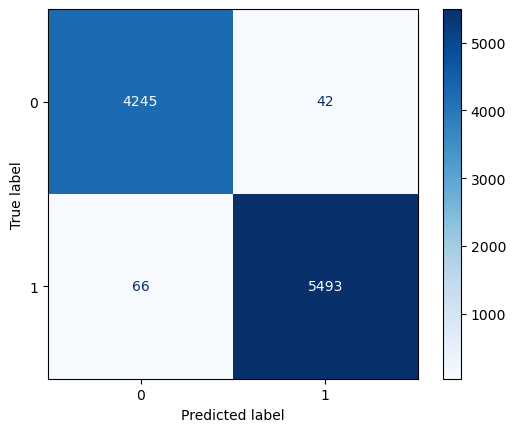

In [60]:

y_pred_prob = model.predict([Xbody_test, Xsub_test, Xnum_test])
y_pred = (y_pred_prob > 0.5).astype(int)  # seuil à 0.5 pour convertir en 0/1

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')



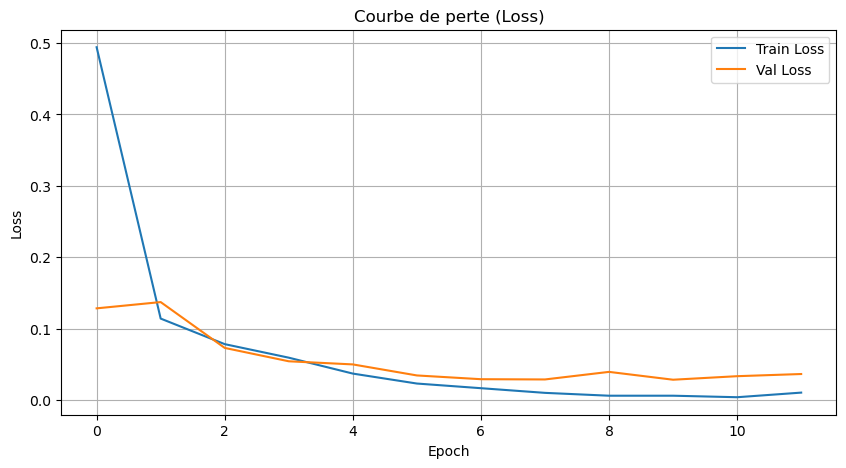

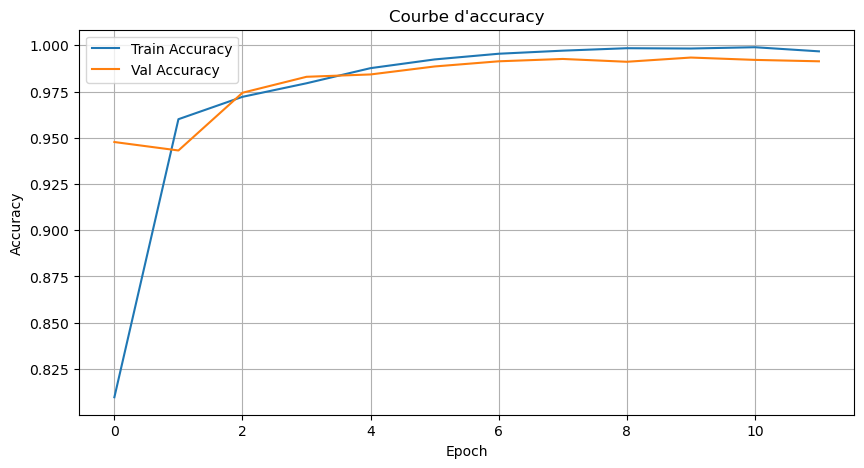

In [76]:
import matplotlib.pyplot as plt

# --- Courbe de loss ---
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Courbe de perte (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# --- Courbe d'accuracy ---
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Courbe d'accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Second Model

We will now try to create a more "classical modele" to see if it can be able to detect spam. To interpret the text on the body and subject collumns we will use TfIDF vectorizer.

In [61]:
## Create a text Variable to get more clarity
df2 =pd.DataFrame()
y2 = df['label']

df2['text'] = df['subject'] + " " + df['body']

X_numeric_cols = ['urls', 'is_free_domain', 'domain_length', 'subdomain_count', 
                'is_risky_tld', 'name_has_digits', 'name_has_specials', 
                'name_length', 'name_word_count', 'sender_domain_encoded', 
                'sender_tld_encoded', 'year', 'day_of_week', 'minute', 
                'second', 'is_weekend', 'timestamp', 'month_sin', 'month_cos', 
                'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos']

In [62]:
df2 = pd.concat([df2, df[X_numeric_cols]], axis=1)
df2

,text,urls,is_free_domain,domain_length,subdomain_count,is_risky_tld,name_has_digits,name_has_specials,name_length,name_word_count,...,is_weekend,timestamp,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,dow_sin,dow_cos
0,"Never agree to be a loser Buck up, your troubl...",1,0,9,1,0,0,0,14,2,...,0,0.080129,-8.660254e-01,-0.500000,0.848644,0.528964,-0.258819,9.659258e-01,0.781831,0.623490
1,Befriend Jenna Jameson \nUpgrade your sex and ...,1,0,9,1,0,0,0,3,1,...,0,0.080129,-8.660254e-01,-0.500000,0.848644,0.528964,-0.258819,9.659258e-01,0.781831,0.623490
2,CNN.com Daily Top 10 >+=+=+=+=+=+=+=+=+=+=+=+=...,1,0,19,2,0,1,1,12,3,...,0,0.080215,-8.660254e-01,-0.500000,0.937752,0.347305,0.866025,-5.000000e-01,0.974928,-0.222521
3,Re: svn commit: r619753 - in /spamassassin/tru...,1,0,9,1,0,0,0,14,2,...,0,0.080129,-8.660254e-01,-0.500000,0.848644,0.528964,-0.258819,9.659258e-01,0.781831,0.623490
4,SpecialPricesPharmMoreinfo \nWelcomeFastShippi...,1,0,19,1,0,0,0,14,2,...,0,0.080129,-8.660254e-01,-0.500000,0.848644,0.528964,-0.258819,9.659258e-01,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49855,Busy? Home Study Makes Sense! \n\n \n--- \n!...,1,0,13,1,0,0,0,41,4,...,0,-0.399792,-2.449294e-16,1.000000,0.571268,0.820763,-0.707107,7.071068e-01,0.781831,0.623490
49856,Preferred Non-Smoker Rates for Smokers This is...,1,0,8,1,0,0,1,8,3,...,0,-0.399768,-2.449294e-16,1.000000,0.571268,0.820763,-0.258819,9.659258e-01,0.781831,0.623490
49857,"How to get 10,000 FREE hits per day to any web...",1,0,8,1,0,0,0,4,1,...,1,-0.346879,-5.000000e-01,-0.866025,-0.790776,-0.612106,0.866025,-5.000000e-01,-0.781831,0.623490
49858,Cannabis Difference ****Mid-Summer Customer Ap...,0,0,12,2,0,0,1,9,2,...,0,1.095280,-8.660254e-01,-0.500000,0.848644,0.528964,-0.258819,9.659258e-01,0.974928,-0.222521


In [63]:
df2.columns

Index(['text', 'urls', 'is_free_domain', 'domain_length', 'subdomain_count',
       'is_risky_tld', 'name_has_digits', 'name_has_specials', 'name_length',
       'name_word_count', 'sender_domain_encoded', 'sender_tld_encoded',
       'year', 'day_of_week', 'minute', 'second', 'is_weekend', 'timestamp',
       'month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos',
       'dow_sin', 'dow_cos'],
      dtype='object')

In [64]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df2, y2, test_size=0.2, random_state=42, stratify=y2
)

In [65]:
text_transformer = TfidfVectorizer(max_features=5000, stop_words='english')
numeric_transformer = StandardScaler()

In [66]:
## Create a preprocessor to vectorize the text and standardise the datax
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'text'),
        ('num', numeric_transformer, X_numeric_cols)
    ]
)

In [67]:
def create_pipeline(model):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

In [68]:
# --- 4) Define different types of models to test ---
models_and_params = [
    (
        LogisticRegression(max_iter=2000),
        {
            # C controls the inverse of regularization strength.
            # Lower values increase regularization and help reduce overfitting,
            # which is useful with high-dimensional TF-IDF features.
            "classifier__C": [0.1, 1, 5, 10],

            # L2 penalty is stable and works very well with sparse data like TF-IDF.
            "classifier__penalty": ["l2"],

            # lbfgs is a fast and reliable solver for L2 logistic regression.
            # Works very well with large feature spaces.
            "classifier__solver": ["lbfgs"]
        }
    ),

    (
        RandomForestClassifier(),
        {
            # Number of trees. More trees reduce variance but increase training time.
            "classifier__n_estimators": [100, 300],

            # Maximum depth of trees. None = fully grown trees (risk of overfitting).
            "classifier__max_depth": [None, 20, 40],

            # Minimum samples required to split. Higher values reduce overfitting.
            "classifier__min_samples_split": [2, 5],

            # Maximum number of features considered at each split.
            # sqrt and log2 increase randomness and reduce overfitting.
            "classifier__max_features": ["sqrt", "log2"],

            # Automatically adjusts weights to handle class imbalance (spam vs ham).
            "classifier__class_weight": ["balanced"]
        }
    ),

    (
        LinearSVC(),
        {
            # Regularization strength. Controls margin size.
            # Useful to test robustness against over/underfitting.
            "classifier__C": [0.1, 1, 5],

            # Loss function: hinge = classic SVM, squared_hinge often gives smoother gradients.
            "classifier__loss": ["hinge", "squared_hinge"],

            # dual=True is faster when n_features >> n_samples (TF-IDF case).
            # dual=False can be better when n_samples > n_features.
            "classifier__dual": [True, False]
        }
    ),

    (
        LGBMClassifier(),
        {
            # Controls the complexity of trees (max number of leaves).
            # Higher values allow more complex decision boundaries.
            "classifier__num_leaves": [31, 63],

            # Learning rate: controls how fast the boosting learns.
            # Lower values improve generalization but require more iterations.
            "classifier__learning_rate": [0.05, 0.1],

            # Number of boosting iterations (trees). Higher = more accurate but slower.
            "classifier__n_estimators": [200, 500],
        }
    )
]


In [69]:
def run_grid_search(X, y, models_and_params, cv=3, scoring='accuracy'):
    best_models = []
    
    for model, params in models_and_params:
        print(f"GridSearch sur {model.__class__.__name__} ...")
        pipeline = create_pipeline(model)
        grid = GridSearchCV(pipeline, param_grid=params, cv=cv, scoring=scoring, n_jobs=-1, verbose=1)
        grid.fit(X, y)
        print(f"Meilleur score pour {model.__class__.__name__} : {grid.best_score_}")
        print(f"Meilleurs paramètres : {grid.best_params_}\n")
        best_models.append((model.__class__.__name__, grid.best_estimator_, grid.best_score_))
        
    return best_models


In [70]:
best_models = run_grid_search(X_train2, y_train2, models_and_params)

GridSearch sur LogisticRegression ...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Meilleur score pour LogisticRegression : 0.9922553457162756
Meilleurs paramètres : {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}

GridSearch sur RandomForestClassifier ...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Meilleur score pour RandomForestClassifier : 0.9928901657476072
Meilleurs paramètres : {'classifier__class_weight': 'balanced', 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}

GridSearch sur LinearSVC ...
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\malor\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\malor\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\malor\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\malor\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 662, in fit
    self._final_estimator.fit(X

Meilleur score pour LinearSVC : 0.9933980074591539
Meilleurs paramètres : {'classifier__C': 1, 'classifier__dual': True, 'classifier__loss': 'squared_hinge'}

GridSearch sur LGBMClassifier ...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\malor\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\malor\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\malor\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\malor\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^

[LightGBM] [Info] Number of positive: 22262, number of negative: 17120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.239272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 531504
[LightGBM] [Info] Number of data points in the train set: 39382, number of used features: 4868
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.565284 -> initscore=0.262634
[LightGBM] [Info] Start training from score 0.262634
Meilleur score pour LGBMClassifier : 0.9949469390896023
Meilleurs paramètres : {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 500, 'classifier__num_leaves': 31}



best_models


## Evaluation of the Best Models

C:\Users\malor\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\malor\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


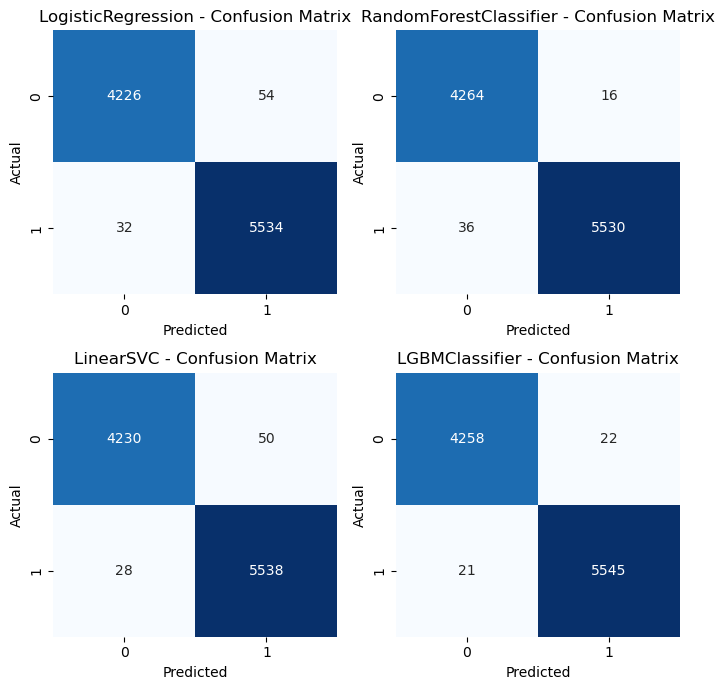

In [71]:
# --- Stock the Metrics ---
metrics_list = []

plt.figure(figsize=(7, 7))

for i, (name, model, score) in enumerate(best_models):
    
    # Prédiction
    y_pred = model.predict(X_test2)
    y_proba = None
    try:
        y_proba = model.predict_proba(X_test2)[:,1]  # pour les modèles probabilistes
    except:
        try:
            y_proba = model.decision_function(X_test2)  # pour SVM
        except:
            pass

    # Calcul of metrics
    acc = accuracy_score(y_test2, y_pred)
    prec = precision_score(y_test2, y_pred)
    rec = recall_score(y_test2, y_pred)
    f1 = f1_score(y_test2, y_pred)
    roc = roc_auc_score(y_test2, y_proba) if y_proba is not None else None
    
    metrics_list.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "ROC-AUC": roc
    })
    
    # Display confusion Matrixs
    cm = confusion_matrix(y_test2, y_pred)
    plt.subplot(2, 2, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [72]:
# --- DataFramemetrics summary ---
metrics_df = pd.DataFrame(metrics_list)
display(metrics_df)

# ---Display the summary ---
metrics_plot = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,LogisticRegression,0.991265,0.990336,0.994251,0.992290,0.999521
1,RandomForestClassifier,0.994719,0.997115,0.993532,0.995320,0.999798
2,LinearSVC,0.992078,0.991052,0.994969,0.993007,0.999560
3,LGBMClassifier,0.995633,0.996048,0.996227,0.996138,0.999806


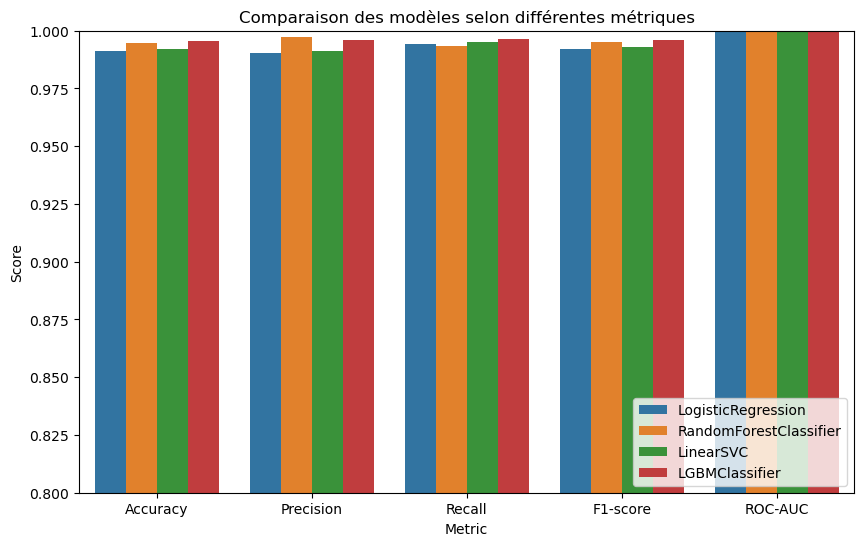

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_plot, x='Metric', y='Score', hue='Model')
plt.title("Comparaison des modèles selon différentes métriques")
plt.ylim(0.8, 1)
plt.legend(loc='lower right')
plt.show()

C:\Users\malor\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


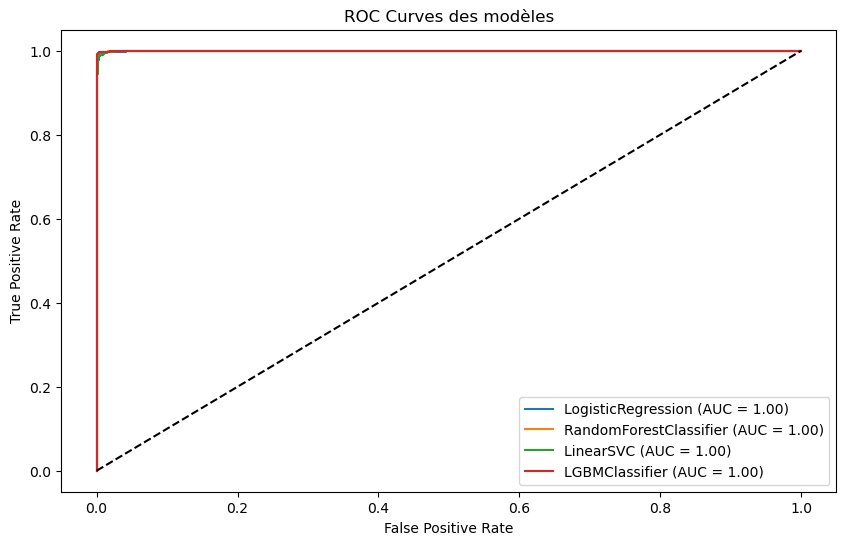

In [74]:
# --- Courbes ROC ---
plt.figure(figsize=(10, 6))
for name, model, _ in best_models:
    try:
        y_proba = model.predict_proba(X_test2)[:,1]
    except:
        try:
            y_proba = model.decision_function(X_test2)
        except:
            continue
    
    fpr, tpr, _ = roc_curve(y_test2, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')  # ligne diagonale
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves des modèles")
plt.legend(loc="lower right")
plt.show()

Top 10 des variables les plus importantes :


,Feature,Importance
4954,wrote,0.044169
3239,org,0.022971
2742,list,0.022699
2745,listinfo,0.019694
5009,sender_domain_encoded,0.018578
1065,com,0.015669
2838,mailman,0.015659
5016,timestamp,0.012941
5017,month_sin,0.011289
2836,mailing,0.011260


C:\Users\malor\AppData\Local\Temp\ipykernel_25744\2889517681.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')


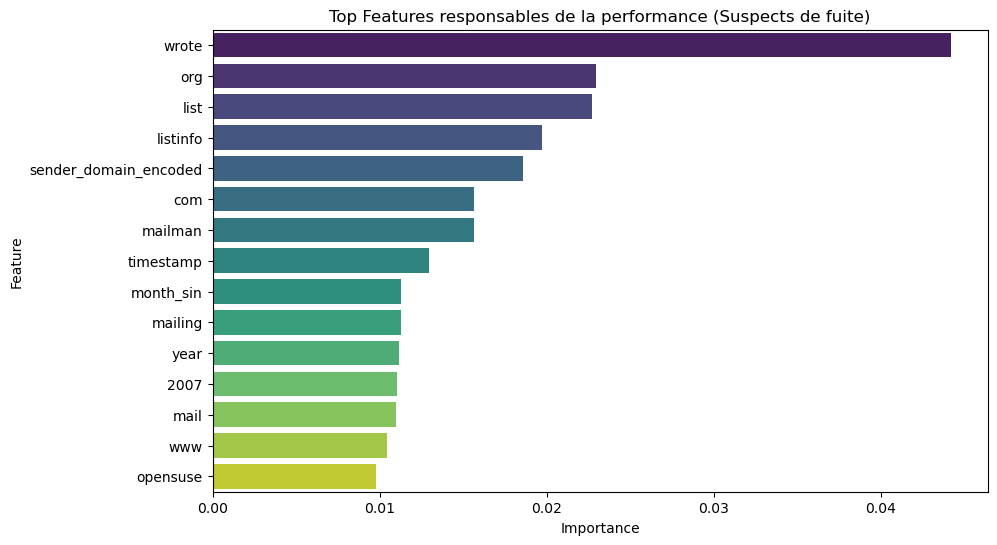

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Récupérons le meilleur estimateur Random Forest de ta liste
# (Assure-toi que best_models contient bien le RF en index 1 ou cherche le par nom)
rf_model_tuple = [m for m in best_models if m[0] == 'RandomForestClassifier'][0]
rf_pipeline = rf_model_tuple[1] 

# Accéder au modèle et au préprocesseur dans le pipeline
model = rf_pipeline.named_steps['classifier']
preprocessor = rf_pipeline.named_steps['preprocessor']

# --- Récupérer les noms des features après transformation ---
# 1. Noms des features TF-IDF
tfidf_feature_names = preprocessor.named_transformers_['text'].get_feature_names_out()

# 2. Noms des features numériques (ce sont les mêmes que X_numeric_cols)
numeric_feature_names = X_numeric_cols

# 3. Combiner tout
all_feature_names = list(tfidf_feature_names) + list(numeric_feature_names)

# --- Récupérer les importances ---
importances = model.feature_importances_

# Créer un DataFrame pour visualiser
feat_imp_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Afficher le Top 10 des features qui "trichent"
print("Top 10 des variables les plus importantes :")
display(feat_imp_df.head(15))

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top Features responsables de la performance (Suspects de fuite)')
plt.show()